# Clustering and Classification with K-Means - Seeds Dataset

Clustering is an unsupervised machine learning task based on the determination of certain groups in the data according to its features. In some situations, we previously expect a number of groups to be discovered by the algorithm, however it can not be done everytime and the job of the algorithm is to find a good way (or the best way) to determine these groups.

The "unsupervised" part come from the fact that we do not know the label of each data point previously. In the situations that we do know these labels, we are dealing with a classification task.

The dataset used in this example is the Seeds dataset. It is formed by informations of three different varieties of wheat: Kama, Rosa and Canadian, 70 elements each, randomly selected for a experiment. The informations about the varieties of wheat are distributed in seven variables, they are:

* **The area A;**
* **The perimeter P;**
* **The compactness C = 4*pi*A/P^2;**
* **The length of kernel;**
* **The width of kernel;**
* **The asymmetry coefficient;**
* **The length of kernel groove.**

There is a lot of possibilities in terms of which algorithm to use on a clustering task. Here we are going to explore the K-means algorithm considering both clustering and classification scenarios.

## Pre-processing

In [1]:
#Initial imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()

The dataset file used here has no header (name of the variables), so let's creat a header for it and import the data:

In [2]:
header = ['area', 'perimeter', 'compactness', 'length', 'width',
          'asy_coef', 'len_kernelG', 'wheat']

In [3]:
seeds = pd.read_table('C:/Users/Eduardo/Documents/Acadêmicos/Bases de Dados/seeds_dataset.txt',
                     names = header)

Now, let's take a look at the first 5 rows of the dataset and verify the type of the variables:

In [4]:
seeds.head()

,area,perimeter,compactness,length,width,asy_coef,len_kernelG,wheat
0,15.26,14.84,0.8710,5.763,3.312,2.221,5.220,1
1,14.88,14.57,0.8811,5.554,3.333,1.018,4.956,1
2,14.29,14.09,0.9050,5.291,3.337,2.699,4.825,1
3,13.84,13.94,0.8955,5.324,3.379,2.259,4.805,1
4,16.14,14.99,0.9034,5.658,3.562,1.355,5.175,1


In [5]:
seeds.dtypes

area           float64
perimeter      float64
compactness    float64
length         float64
width          float64
asy_coef       float64
len_kernelG    float64
wheat            int64
dtype: object

Note the variable "wheat". It will come handy when considering the scenario where the labels are known. Except for this "wheat" variable, all of the others are type float64.

Another important information to know is how many missing values are in the data set (if there is any). It can be done quickly using the following code:

In [6]:
seeds.isnull().sum()

area           0
perimeter      0
compactness    0
length         0
width          0
asy_coef       0
len_kernelG    0
wheat          0
dtype: int64

Now we know that none of the variables have missing values.

## Exploratory Data Analysis

In terms of exploratory data analysis, the first step that can be taken is to summary the data to numerically analyse the aspects of the data:

In [7]:
seeds.drop("wheat", axis = 1).describe()

,area,perimeter,compactness,length,width,asy_coef,len_kernelG
count,210.000000,210.000000,210.000000,210.000000,210.000000,210.000000,210.000000
mean,14.847524,14.559286,0.870999,5.628533,3.258605,3.700201,5.408071
std,2.909699,1.305959,0.023629,0.443063,0.377714,1.503557,0.491480
min,10.590000,12.410000,0.808100,4.899000,2.630000,0.765100,4.519000
25%,12.270000,13.450000,0.856900,5.262250,2.944000,2.561500,5.045000
50%,14.355000,14.320000,0.873450,5.523500,3.237000,3.599000,5.223000
75%,17.305000,15.715000,0.887775,5.979750,3.561750,4.768750,5.877000
max,21.180000,17.250000,0.918300,6.675000,4.033000,8.456000,6.550000


Based on that summary of the data, the important conclusions that can be made are:

* **The obtained means for "area" and "perimeter" are relatively close;**
* **The variables "length" and "len_kernelG" are considerably similar;**
* **The minimum and maximum values of compactness found were 0.81 and 0.92, respectively;**
* **The mean value of width was 3.26;**
* **The range of the asymmetry coefficient was 7.7.**

We can also visualize how the data "behave" by plotting the distribution shape of the variables:

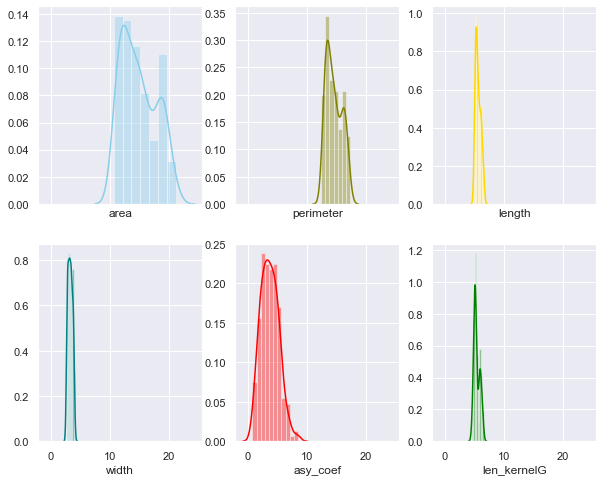

In [8]:
fig, axes = plt.subplots(2, 3, figsize=(10, 8), sharex=True)
sns.distplot( seeds.area , color="skyblue", ax=axes[0, 0])
sns.distplot( seeds.perimeter , color="olive", ax=axes[0, 1])
sns.distplot( seeds.length , color="gold", ax=axes[0, 2])
sns.distplot( seeds.width , color="teal", ax=axes[1, 0])
sns.distplot( seeds.asy_coef , color="red", ax=axes[1, 1])
sns.distplot( seeds.len_kernelG , color="green", ax=axes[1, 2])

The distribution plot is good to visualize the variables in terms of dispersion, symmetry and kurtosis. These informations can help us understand the nature of the data and how to deal with it. For example, from the plot above, we can see that "area" is the one with the highest variation, and that "asy_coef" is relatively symmetric in its domain.

**Obs:** The variable "compactness" was not considered because its variation is insignificant in our context.

As said before, for this dataset the job of the algorithm is based on finding the groups of different wheats (we already know that there are 3 groups to be found). Now we can use the "wheat" variable to visualize the 3 groups in the data:

D:\Python\lib\site-packages\statsmodels\nonparametric\kde.py:487: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
D:\Python\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


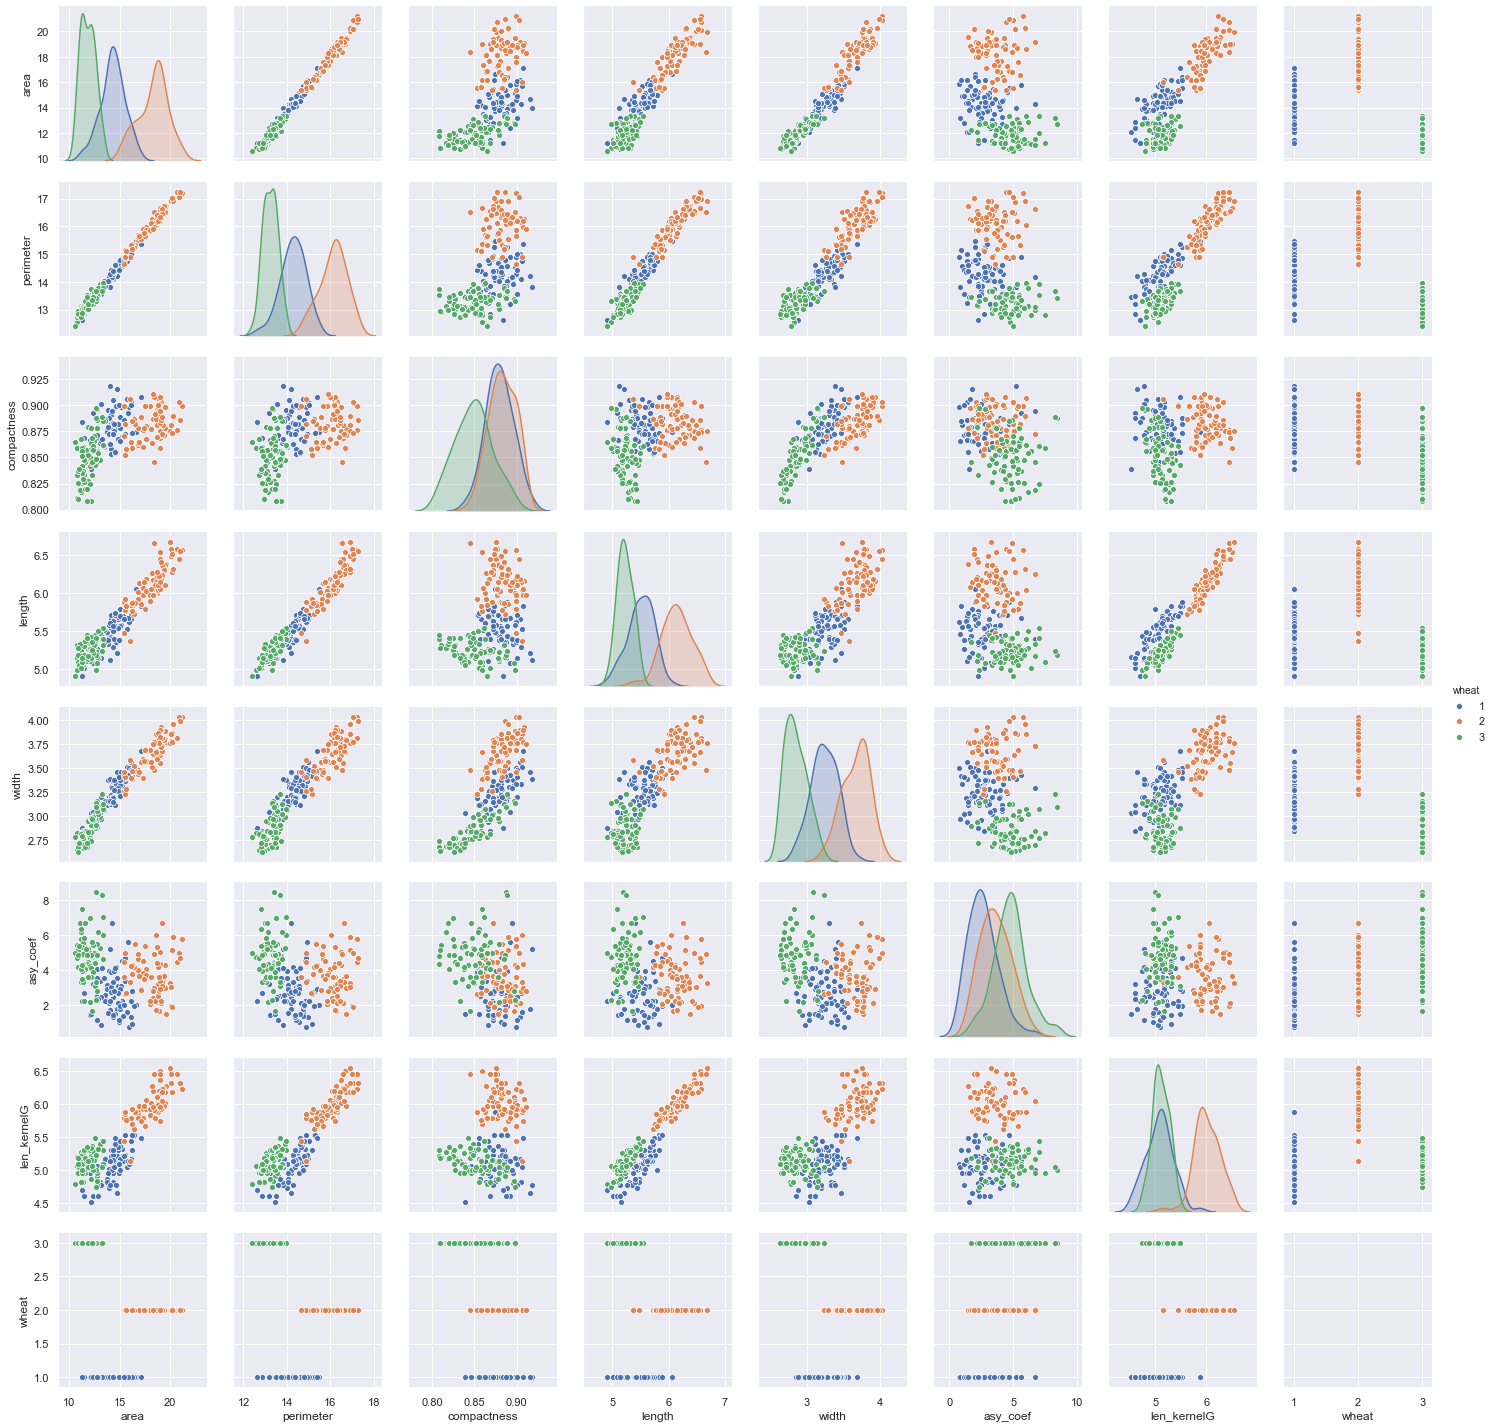

In [9]:
sns.pairplot(seeds, hue = "wheat")

In addition to the scatter plots between the different pairs of variables, the pairplot above also presents the layered kernel density estimations. Besides that, we can see how the groups are formed and also that some samples would probably be difficult to define if it belongs to one group or another (Rosa or Canadian/blue or green).

Checking the correlations is always important an important thing to do and it can be extremely useful in machine learning. For this dataset, the correlation status is:

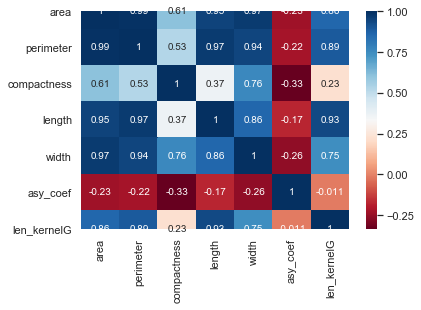

In [10]:
corr = seeds.drop("wheat", axis = 1).corr()
sns.heatmap(corr, xticklabels = corr.columns, yticklabels = corr.columns, cmap = "RdBu", annot=True)

The heatmap says that several variables are highly correlated. In a regression context for example, we would probably have problems with multicolinearity. This is also an indication that other machine learning techniques such as Principal Components Analysis could be used to summarize the information or to deal with multicolinearity.

## Using the K-means Algorithm

In [11]:
#instanciating the k-means
from sklearn.cluster import KMeans

model = KMeans(n_clusters = 3, random_state = 97)
X = seeds.drop("wheat", axis = 1)

Note that we passed the number of cluster that we expect in the data (3 wheats) and sat the random state to reproduce the same results everytime. To define the number of clusters, we can always look at the pair plots to get an ideia or we can let the algorithm decide for itself. Here we got a previous infomation and variable (wheat) to work based on, but that is not a reality for every case.

In [12]:
#creating a columns with the estimate classification to evaluate the perfomance
kclasses = model.fit(X).labels_
seeds['kclasses'] = kclasses

In [13]:
#Part of the new dataset with the column for the K-means classification
seeds.tail(10)

,area,perimeter,compactness,length,width,asy_coef,len_kernelG,wheat,kclasses
200,12.38,13.44,0.8609,5.219,2.989,5.472,5.045,3,0
201,12.67,13.32,0.8977,4.984,3.135,2.300,4.745,3,1
202,11.18,12.72,0.8680,5.009,2.810,4.051,4.828,3,0
203,12.70,13.41,0.8874,5.183,3.091,8.456,5.000,3,0
204,12.37,13.47,0.8567,5.204,2.960,3.919,5.001,3,0
205,12.19,13.20,0.8783,5.137,2.981,3.631,4.870,3,0
206,11.23,12.88,0.8511,5.140,2.795,4.325,5.003,3,0
207,13.20,13.66,0.8883,5.236,3.232,8.315,5.056,3,0
208,11.84,13.21,0.8521,5.175,2.836,3.598,5.044,3,0
209,12.30,13.34,0.8684,5.243,2.974,5.637,5.063,3,0


We can see in the current seeds dataset (with the kclasses variable) that the Canadian wheat is represented as "3" in the "wheat" variable and as "0" in the "kclasses" variable. To avoid confusion, we can make the change as follows:

In [14]:
seeds.kclasses.replace(0,3, inplace=True)

In [15]:
seeds.tail(10)

,area,perimeter,compactness,length,width,asy_coef,len_kernelG,wheat,kclasses
200,12.38,13.44,0.8609,5.219,2.989,5.472,5.045,3,3
201,12.67,13.32,0.8977,4.984,3.135,2.300,4.745,3,1
202,11.18,12.72,0.8680,5.009,2.810,4.051,4.828,3,3
203,12.70,13.41,0.8874,5.183,3.091,8.456,5.000,3,3
204,12.37,13.47,0.8567,5.204,2.960,3.919,5.001,3,3
205,12.19,13.20,0.8783,5.137,2.981,3.631,4.870,3,3
206,11.23,12.88,0.8511,5.140,2.795,4.325,5.003,3,3
207,13.20,13.66,0.8883,5.236,3.232,8.315,5.056,3,3
208,11.84,13.21,0.8521,5.175,2.836,3.598,5.044,3,3
209,12.30,13.34,0.8684,5.243,2.974,5.637,5.063,3,3


Now that we have a label variable estimated by the K-means, we can call for another pairplot to see how similar it is to the previous pairplot:

D:\Python\lib\site-packages\statsmodels\nonparametric\kde.py:487: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
D:\Python\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


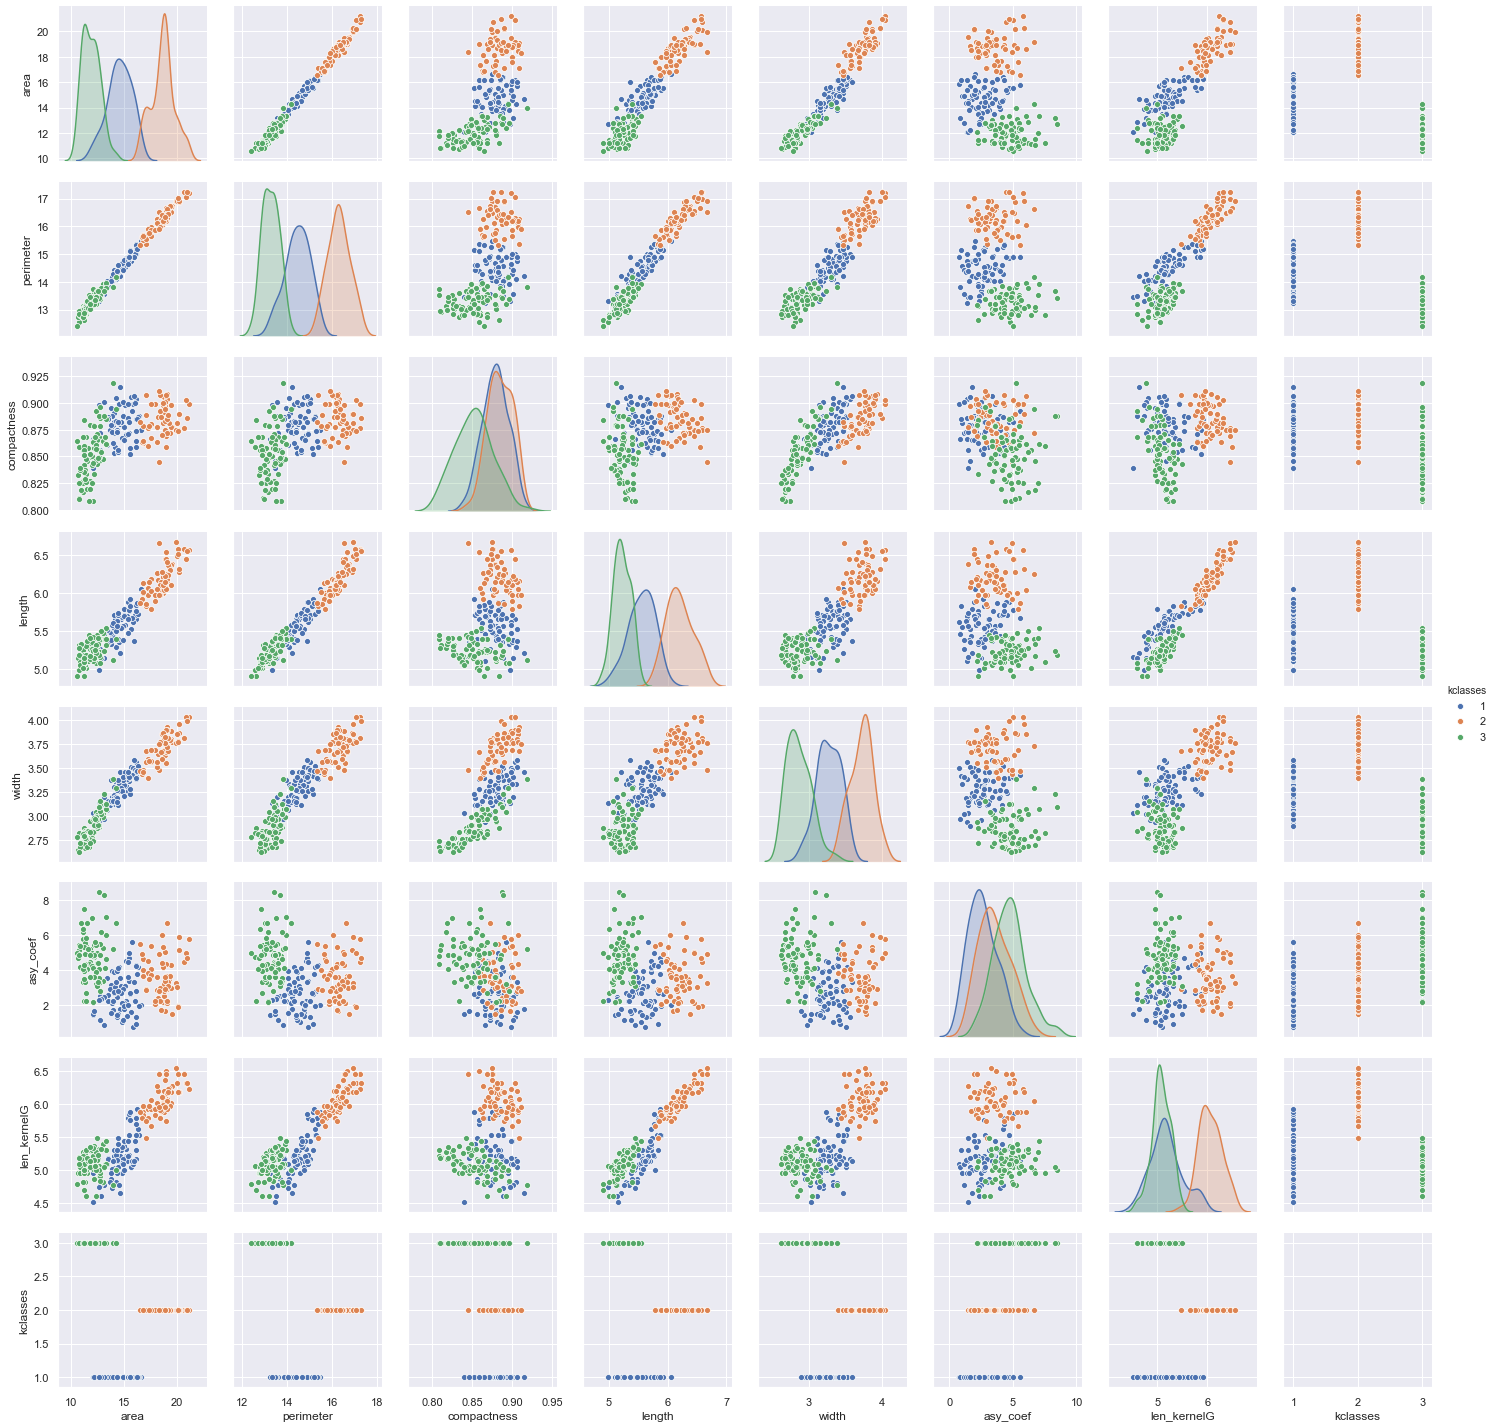

In [16]:
sns.pairplot(seeds.drop("wheat", axis=1),  hue = "kclasses")

Now, let´s compare of both pairplots:

![Real Pairplot vs Estimated Pairplot](comp.png)

We can see that both pairplots are very similar, which means that K-means did a good job finding the 3 clusters in the data. If you look closely, you will see that the algorithm had a harder time on deciding whether an observation would be defined as Kama wheat or Canadian wheat, and Kama wheat or Rosa wheat. It seems that the Kama wheat has similarities with both Rosa and Canadian wheat, but these last two are not so similar to each other.

Because we now have both a real and an estimated labels variables, we are able to use some score metrics and tools such as accuracy, precision, recall, F1-score and confusion matrix to analyze how good our results were, treating this as a classification problem.

## Evaluating the Results

In [17]:
#importing some metric tools
from sklearn.metrics import accuracy_score, confusion_matrix, f1_score

In [18]:
confusion_matrix(seeds.wheat, seeds.kclasses)

array([[60,  1,  9],
       [10, 60,  0],
       [ 2,  0, 68]], dtype=int64)

Just like in the 2x2 case, we are more interested on the main diagonal (where the true positives are). Here, the rows are the true labels and the columns are the predicted labels.

As we expected, the algorithm had some problems dealing with the Kama-Canadian and Kama-Rosa classification, however it seems that we had good results in the general scenario. To confirm that, we can use the statistics from the confusion matrix to summerize the performance of K-means:

In [19]:
accuracy_score(seeds.wheat, seeds.kclasses)

0.8952380952380953

In [20]:
f1_score(seeds.wheat, seeds.kclasses, average = 'macro')

0.8954236749711889

The resulting measures were very close. The accuracy score is a simple measure that gives an ideia of perfomance, based on the proportion of "true predictions" (true positives and true negatives) over all predictions. In contrast, the F1-score is a more sophisticated measures, considering a weightining between precision and recall to summerize the performance.

The F1-score is usually used for binary cases, however, the f1_score method from sklearn provides us an option for variables with 3 or more classes. When average = 'macro', the method will calculate the score for each label and then it will take an unweighted mean of them.

## How to Choose the Number of Clusters?

An important question when dealing with the K-means algorith is: what number of clusters could I choose for certain data? Well, in some situations (if you do not have this information already), the "right" number of clusters can be seen simply by plotting the data, since certain types of data are very specific. But there are situations where the finding of the "right" number of clusters is an exclusive job for the algorithm, however, how can we know if we got a good result? There is a point where increasing the number of clusters would not be worth the performance payback. Althought the following methods do not give us always the best choice, the cutoff can be found using them, and they are: the elbow method or the sihouette method.

**OBS:** The elbow method does not work so well for poorly clustered data.

### The Elbow Method

Text(0, 0.5, 'Squared Sum of Errors')

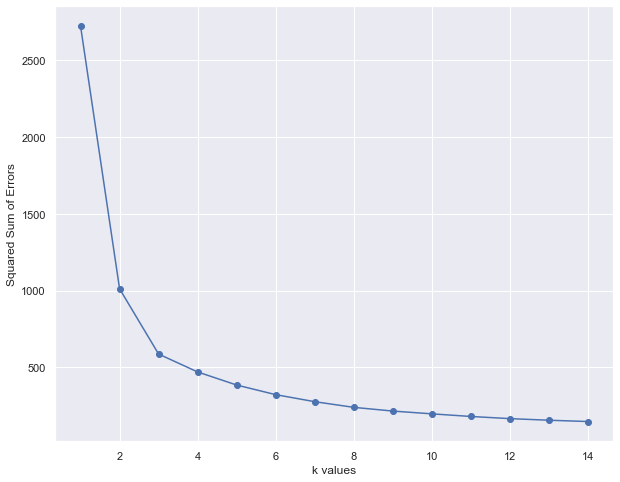

In [22]:
X = seeds.drop(["wheat", "kclasses"], axis = 1)
sse = []
k_list = np.arange(1, 15)

for k in k_list:
    k_means = KMeans(n_clusters = k)
    k_means.fit(X)
    sse.append(k_means.inertia_)
    
    
fig = plt.subplots(1, 1, figsize = (10, 8))
ax = plt.axes()
ax.plot(k_list, sse, '-o')
ax.set_xlabel('k values')
ax.set_ylabel('Squared Sum of Errors')

A problem with the elbow method is that sometimes it is not so clear to see where the elbow is. Is it 2 here? maybe 3? We already know that the data represents 3 types of wheat, but it is not perfectly clear on the previous plot. Let's go ahead and check the other method.

### The Sihouette Method

In [23]:
from sklearn.metrics import silhouette_samples

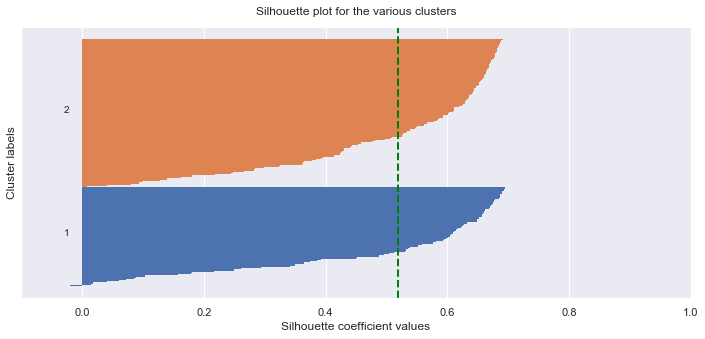

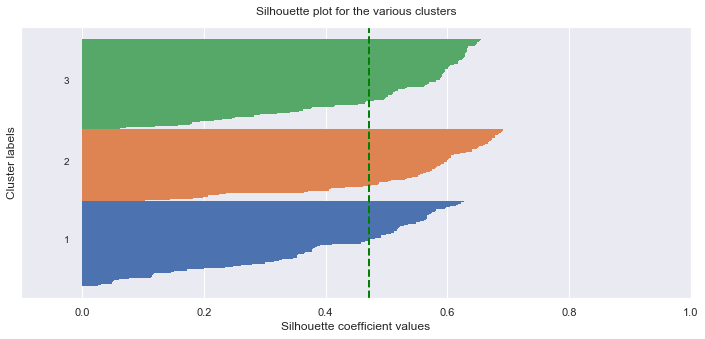

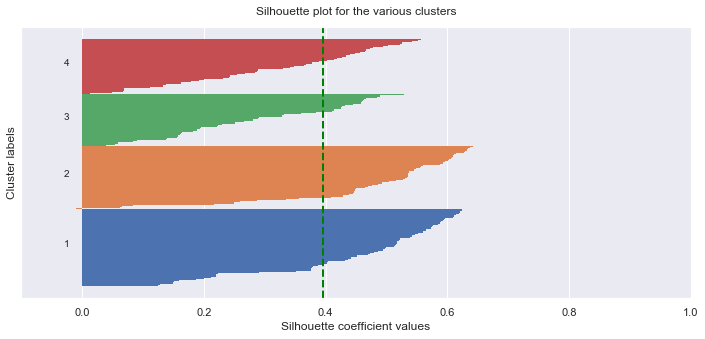

In [24]:
for i, k in enumerate([2, 3, 4]):
    fig, ax1 = plt.subplots(1, 1)
    fig.set_size_inches(12, 5)
    
    # Run the Kmeans algorithm
    km = KMeans(n_clusters=k)
    labels = km.fit_predict(X)
    centroids = km.cluster_centers_

    # Get silhouette samples
    silhouette_vals = silhouette_samples(X, labels)

    # Silhouette plot
    y_ticks = []
    y_lower, y_upper = 0, 0
    for i, cluster in enumerate(np.unique(labels)):
        cluster_silhouette_vals = silhouette_vals[labels == cluster]
        cluster_silhouette_vals.sort()
        y_upper += len(cluster_silhouette_vals)
        ax1.barh(range(y_lower, y_upper), cluster_silhouette_vals, edgecolor='none', height=1)
        ax1.text(-0.03, (y_lower + y_upper) / 2, str(i + 1))
        y_lower += len(cluster_silhouette_vals)

    # Get the average silhouette score and plot it
    avg_score = np.mean(silhouette_vals)
    ax1.axvline(avg_score, linestyle='--', linewidth=2, color='green')
    ax1.set_yticks([])
    ax1.set_xlim([-0.1, 1])
    ax1.set_xlabel('Silhouette coefficient values')
    ax1.set_ylabel('Cluster labels')
    ax1.set_title('Silhouette plot for the various clusters', y=1.02)

Check [Mukesh Chaudhary](https://medium.com/@cmukesh8688/silhouette-analysis-in-k-means-clustering-cefa9a7ad111) for the sihouette code.

The number of clusters via sihouette method is chosen based on the sihouette score. This score is a number from -1 to 1 and the closer it is to 1, more defined the clusters are. For our case, considering 2, 3 and 4 clusters, the sihoutte method indicates that 2 would be best scenario to choose. It means that mathematicaly, would better to work with 2 groups instead of 3, however we know that there are 3 groups to be considered. This kind of mismatch is one of the reasons why unsupervised learning can be both a great tool or an absolute mess if the problem is not handled correctly.

**OBS:** There are other ways to investigate the optimal number of clusters.